In [1]:
!pip install loguru
from loguru import logger

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
logger.info("\nboolean_to_integer features: {}".format(7))

2021-03-18 13:55:06.686 | INFO     | __main__:<module>:1 - 
boolean_to_integer features: 7


In [3]:
x = !conda list
print(len(x))
x

175


['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'argon2-cffi               20.1.0                   pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     20.3.0                   pypi_0    pypi',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.5              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1           hecc5488_0    conda-forge',
 'cached-property           1.5.2          

In [4]:
%matplotlib inline


# Comparison of the combination of over- and under-sampling algorithms


This example shows the effect of applying an under-sampling algorithms after
SMOTE over-sampling. In the literature, Tomek's link and edited nearest
neighbours are the two methods which have been used and are available in
imbalanced-learn.




In [5]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

print(__doc__)

Automatically created module for IPython interactive environment


The following function will be used to create toy dataset. It using the
``make_classification`` from scikit-learn but fixing some parameters.



In [6]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

The following function will be used to plot the sample space after resampling
to illustrate the characteristic of an algorithm.



In [7]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

The following function will be used to plot the decision function of a
classifier given some data.



In [8]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

``SMOTE`` allows to generate samples. However, this method of over-sampling
does not have any knowledge regarding the underlying distribution. Therefore,
some noisy samples can be generated, e.g. when the different classes cannot
be well separated. Hence, it can be beneficial to apply an under-sampling
algorithm to clean the noisy samples. Two methods are usually used in the
literature: (i) Tomek's link and (ii) edited nearest neighbours cleaning
methods. Imbalanced-learn provides two ready-to-use samplers ``SMOTETomek``
and ``SMOTEENN``. In general, ``SMOTEENN`` cleans more noisy data than
``SMOTETomek``.



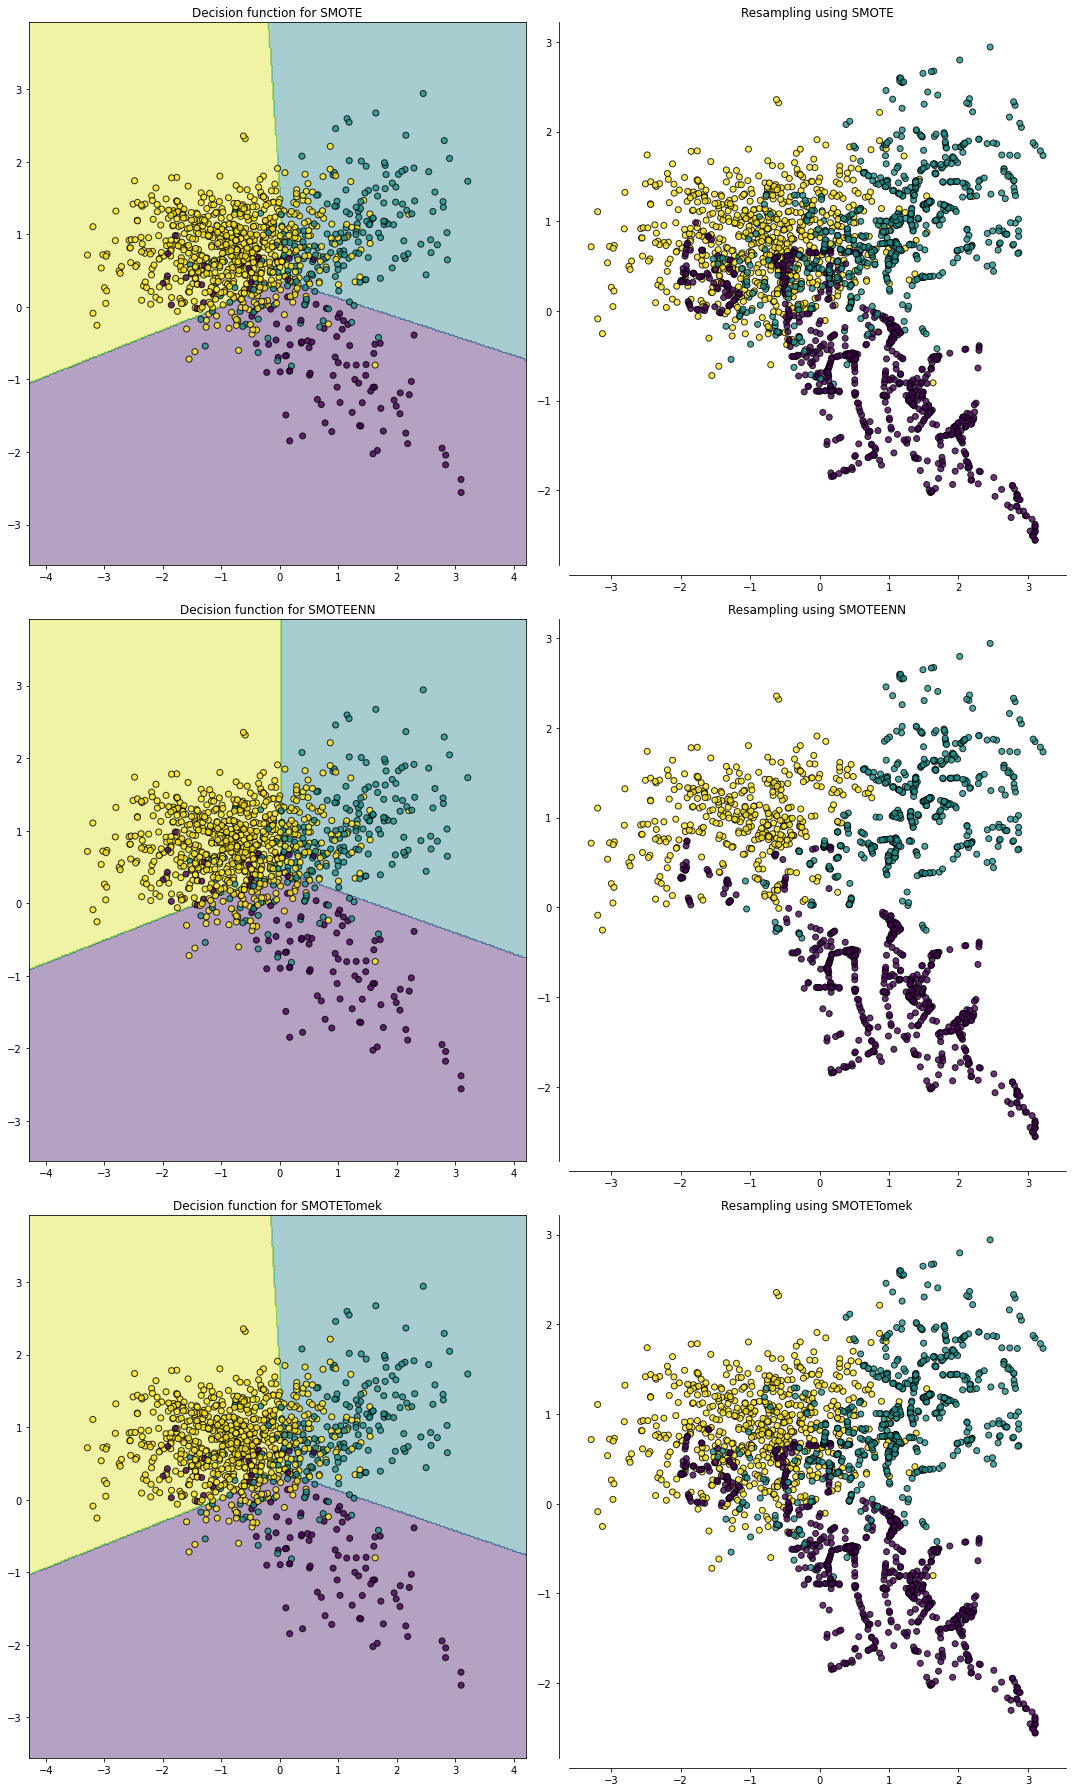

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,
                                                         figsize=(15, 25))
X, y = create_dataset(n_samples=1000, weights=(0.1, 0.2, 0.7))

ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6))
for ax, sampler in zip(ax_arr, (
        SMOTE(random_state=0),
        SMOTEENN(random_state=0),
        SMOTETomek(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()

plt.show()